# Import and setting

In [1]:
# ---------- import
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
# ---------- figure size
plt.rcParams['figure.figsize'] =[8, 6]

# ---------- axes
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.linewidth'] = 1.5

# ---------- ticks
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.width'] = 1.0
plt.rcParams['ytick.major.width'] = 1.0
plt.rcParams['xtick.major.size'] = 8.0
plt.rcParams['ytick.major.size'] = 8.0

# ---------- lines
plt.rcParams['lines.linewidth'] = 2.5

# ---------- grid
plt.rcParams['grid.linestyle'] = ':'

# ---------- font
plt.rcParams['font.size'] = 20
#plt.rcParams['pdf.fonttype'] = 42    # embed fonts in PDF using type42 (True type)

# Data

In [3]:
def load_pkl(filename):
    with open(filename, 'rb') as f:
        return pickle.load(f)

In [4]:
rslt_data = load_pkl('./pkl_data/rslt_data.pkl')

# ---------- sort Selection
#rslt_data.head(10)

# ---------- sort by Energy
rslt_data.sort_values(by=['E_eV_atom']).head(10)

,Select,Spg_num,Spg_sym,Spg_num_opt,Spg_sym_opt,E_eV_atom,Magmom,Opt
6,1,147,P-3,164,P-3m1,-4.057053,NaN,done
2,3,129,P4/nmm,229,Im-3m,-4.055381,NaN,done
8,3,132,P4_2/mcm,123,P4/mmm,-3.983964,NaN,done
0,5,133,P4_2/nbc,132,P4_2/mcm,-3.877170,NaN,done
5,1,156,P3m1,156,P3m1,-3.816091,NaN,done
9,2,75,P4,125,P4/nbm,-3.785552,NaN,done
3,5,129,P4/nmm,123,P4/mmm,-3.652067,NaN,done
4,4,102,P4_2nm,102,P4_2nm,-3.409063,NaN,done
7,4,115,P-4m2,115,P-4m2,-3.071566,NaN,done
1,2,229,Im-3m,221,Pm-3m,-2.250674,NaN,done


In [5]:
# ---------- Selection
smax = rslt_data['Select'].max()
print('Number of selection: {}'.format(smax))

# ---------- Number of structures
ndata = len(rslt_data)
print('Number of data: {}'.format(ndata))

# ---------- check success and error
nsuccess = rslt_data['E_eV_atom'].count()
nerror = ndata - nsuccess
print('Success: {}'.format(nsuccess))
print('Error: {}'.format(nerror))

# ---------- minimum
Emin = rslt_data['E_eV_atom'].min()
print('Emin: {} eV/atom'.format(Emin))

Number of selection: 5
Number of data: 10
Success: 10
Error: 0
Emin: -4.057052953925473 eV/atom


# Energy vs. trial

Text(0, 0.5, 'Energy (eV/atom)')

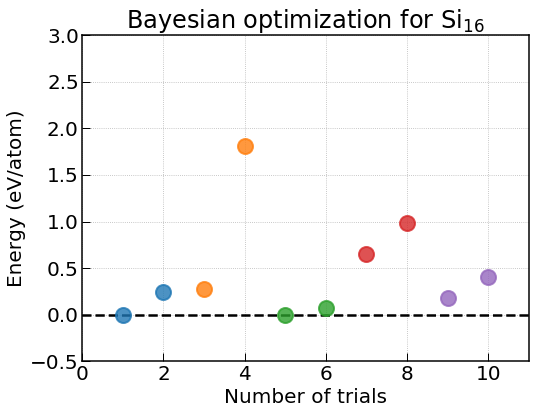

In [6]:
fig, ax = plt.subplots()

# ---------- axis
dx = 1    # margin in xtick
ax.set_xlim([1-dx, ndata+dx])
ax.set_ylim([-0.5, 3])

# ---------- hline at zero
ax.hlines(0.0, -dx, ndata+dx, 'k', '--')

# ---------- plot
#ax.plot(rslt_data['E_eV_atom'] - Emin, 'o', ms=15, mew=2.0, alpha=0.8)


# ---------- color coded by selection  
tx = 0
for s in range(1, smax+1):    # selection starts from 1
    sfilter = rslt_data['Select'] == s
    num = len(rslt_data[sfilter])
    x = np.arange(1, num+1) + tx
    ax.plot(x, rslt_data['E_eV_atom'][sfilter] - Emin, 'o', ms=15, mew=2.0, alpha=0.8)
    tx += num

# ---------- title and label
ax.set_title('Bayesian optimization for Si$_{16}$')
ax.set_xlabel('Number of trials')
ax.set_ylabel('Energy (eV/atom)')

In [7]:
# ---------- save figure
fig.savefig('Si16_BO.png', bbox_inches='tight')    # PNG
#fig.savefig('title_RS.png', bbox_inches='tight', dpi=300)    # high dpi PNG
#fig.savefig('title_RS.pdf', bbox_inches='tight')    # PDF